# 08 - Face Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('data/Nadia_Murad.jpg',0)
denis = cv2.imread('data/Denis_Mukwege.jpg',0)
solvay = cv2.imread('data/solvay_conference.jpg',0)

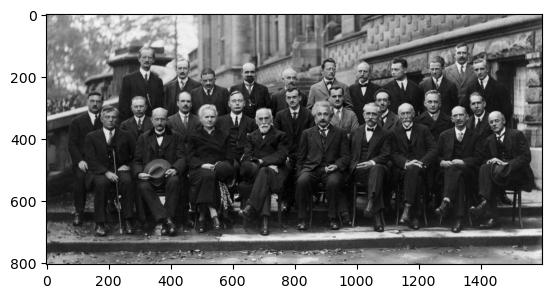

In [3]:
plt.imshow(solvay,cmap='gray')

In [10]:
# the image has to satisfy all the features contained in this set
# in order to be determined as a face.
face_cascade = cv2.CascadeClassifier(
    # data/haarcascades/haarcascade_frontalface_default.xml
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [11]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

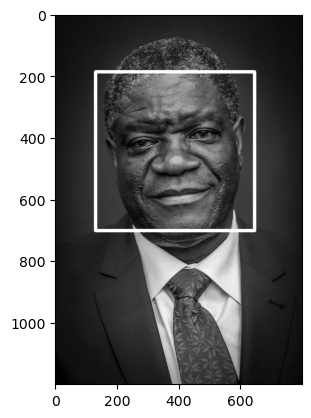

In [14]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

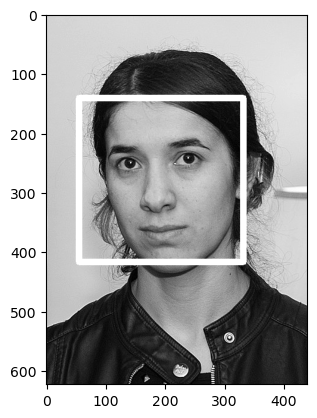

In [15]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

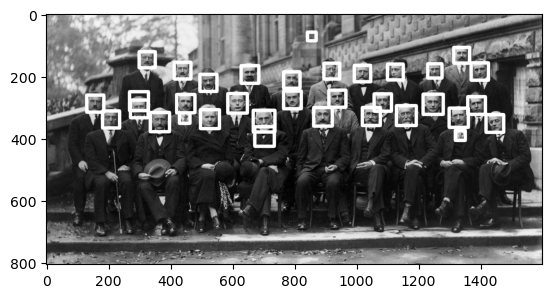

In [16]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [17]:
def adjusted_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(
        face_img,
        scaleFactor=1.2,
        minNeighbors=5
    )

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

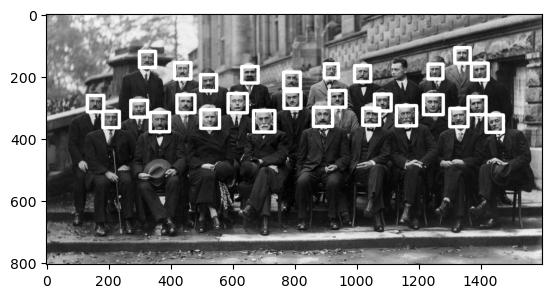

In [18]:
result = adjusted_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [19]:
eye_cascade = cv2.CascadeClassifier(
    # data/haarcascades/haarcascade_frontalface_default.xml
    cv2.data.haarcascades + "haarcascade_eye.xml"
)

In [22]:
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(
        face_img,
        scaleFactor=1.2,
        minNeighbors=5
    )

    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

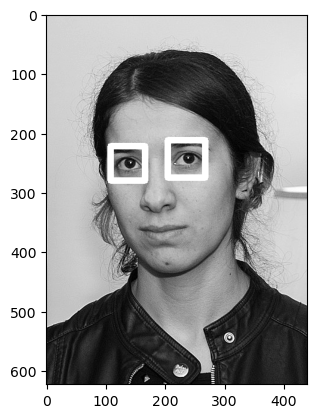

In [23]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

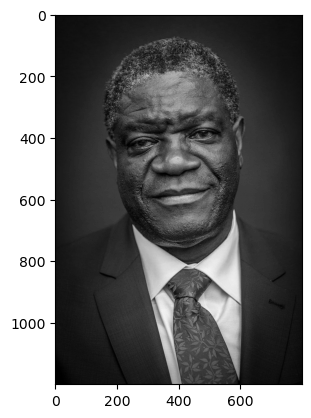

In [24]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')
# the white in the eyes is too dark to be detected

In [27]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Video Face Detect', frame)
    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@3214.416] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ WARN:0@3214.416] global obsensor_stream_channel_v4l2.cpp:82 xioctl ioctl: fd=-1, req=-2140645888
[ WARN:0@3214.416] global obsensor_stream_channel_v4l2.cpp:138 queryUvcDeviceInfoList ioctl error return: 9
[ WARN:0@3214.416] global obsensor_stream_channel_v4l2.cpp:82 xioctl ioctl: fd=-1, req=-2140645888
[ WARN:0@3214.416] global obsensor_stream_channel_v4l2.cpp:138 queryUvcDeviceInfoList ioctl error return: 9
[ERROR:0@3214.416] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


AttributeError: 'NoneType' object has no attribute 'copy'